# Sprint28
SQL  
①ファイルをデータベースに読み込む  
②ER図  
③問題を解く  
④バックアップをとる  

# ①ファイルをデータベースに読み込む

コマンドのメモ  
postgres --version  # postgresパージョン確認  
postgres -D/usr/local/var/postgres  # postgres起動　　　ただ、友正は「brew services start postgresql」で実行した  
postgres -l          # データベース一覧  
createdb delivery  # データベース作成  
psql delivery        # postgresにログイン  
psql -U [ユーザ名] -d delivery < delivery_launch.sql  
\i delivery_launch.sql

参考にしたサイト  
https://t-shimohara.com/pc/postgressql

ER図作成ツール  
https://erdplus.com/#/

PSequel（Object BrowserやA5SQLのようなツール）  
http://www.psequel.com

In [ ]:
delivery-# \i delivery_launch.sql
SET
SET
SET
SET
SET
SET
SET
SET
CREATE EXTENSION
COMMENT
SET
SET
SET
CREATE TABLE
psql:delivery_launch.sql:49: ERROR:  role "miyaokakiyoshinari" does not exist
CREATE TABLE
psql:delivery_launch.sql:63: ERROR:  role "miyaokakiyoshinari" does not exist
CREATE SEQUENCE
psql:delivery_launch.sql:77: ERROR:  role "miyaokakiyoshinari" does not exist
ALTER SEQUENCE
CREATE TABLE
psql:delivery_launch.sql:98: ERROR:  role "miyaokakiyoshinari" does not exist
CREATE SEQUENCE
psql:delivery_launch.sql:112: ERROR:  role "miyaokakiyoshinari" does not exist
ALTER SEQUENCE
CREATE TABLE
psql:delivery_launch.sql:136: ERROR:  role "miyaokakiyoshinari" does not exist
CREATE SEQUENCE
psql:delivery_launch.sql:150: ERROR:  role "miyaokakiyoshinari" does not exist
ALTER SEQUENCE
CREATE TABLE
psql:delivery_launch.sql:171: ERROR:  role "miyaokakiyoshinari" does not exist
CREATE SEQUENCE
psql:delivery_launch.sql:185: ERROR:  role "miyaokakiyoshinari" does not exist
ALTER SEQUENCE
CREATE TABLE
psql:delivery_launch.sql:207: ERROR:  role "miyaokakiyoshinari" does not exist
CREATE SEQUENCE
psql:delivery_launch.sql:221: ERROR:  role "miyaokakiyoshinari" does not exist
ALTER SEQUENCE
CREATE TABLE
psql:delivery_launch.sql:243: ERROR:  role "miyaokakiyoshinari" does not exist
CREATE SEQUENCE
psql:delivery_launch.sql:257: ERROR:  role "miyaokakiyoshinari" does not exist
ALTER SEQUENCE
CREATE TABLE
psql:delivery_launch.sql:278: ERROR:  role "miyaokakiyoshinari" does not exist
CREATE SEQUENCE
psql:delivery_launch.sql:292: ERROR:  role "miyaokakiyoshinari" does not exist
ALTER SEQUENCE
CREATE TABLE
psql:delivery_launch.sql:310: ERROR:  role "miyaokakiyoshinari" does not exist
CREATE TABLE
psql:delivery_launch.sql:325: ERROR:  role "miyaokakiyoshinari" does not exist
CREATE SEQUENCE
psql:delivery_launch.sql:339: ERROR:  role "miyaokakiyoshinari" does not exist
ALTER SEQUENCE
CREATE TABLE
psql:delivery_launch.sql:361: ERROR:  role "miyaokakiyoshinari" does not exist
CREATE SEQUENCE
psql:delivery_launch.sql:375: ERROR:  role "miyaokakiyoshinari" does not exist
ALTER SEQUENCE
CREATE TABLE
psql:delivery_launch.sql:396: ERROR:  role "miyaokakiyoshinari" does not exist
CREATE SEQUENCE
psql:delivery_launch.sql:410: ERROR:  role "miyaokakiyoshinari" does not exist
ALTER SEQUENCE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
COPY 1
COPY 3
 setval 
--------
      3
(1 row)

COPY 63
 setval 
--------
     63
(1 row)

COPY 50000
 setval 
--------
  50000
(1 row)

COPY 3
 setval 
--------
      3
(1 row)

COPY 50000
 setval 
--------
  50000
(1 row)

COPY 50000
 setval 
--------
  50000
(1 row)

COPY 50000
 setval 
--------
  50000
(1 row)

COPY 11
COPY 50000
 setval 
--------
  50000
(1 row)

COPY 50000
 setval 
--------
  50000
(1 row)

COPY 63
 setval 
--------
     63
(1 row)

ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
CREATE INDEX
CREATE INDEX
CREATE INDEX
CREATE INDEX
CREATE INDEX
CREATE INDEX
CREATE INDEX
CREATE INDEX
CREATE INDEX
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE

# ②ER図

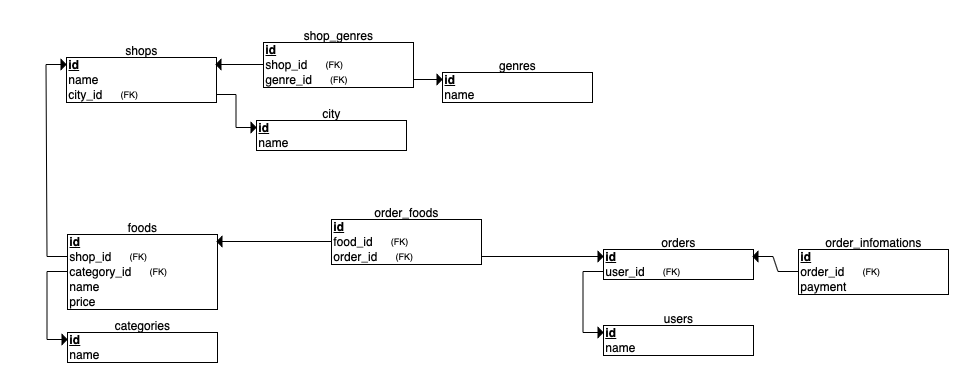

In [4]:
from IPython.display import Image, display_png
# png_file: str
display_png(Image("erdplus-diagram-2.png"))

# ③問題を解く

# Question
・user_id 1のuserが注文した件数  
・最後に注文したuserの名前  
・cityの名称一覧(id, nameのみ出力)  
・渋谷区のshop一覧取得  
・1のuserが注文した料理一覧を取得  
・1のuserが注文した料理の合計金額を取得  
・全てのuserの注文金額をそれぞれ取得  
・全てのuserの注文金額が高い順に並び替えて名前と金額を取得  
・category別の商品一覧を取得    
・userの名前に"a"が含まれる人を出力  
・userのidが5以下の人たち  
・注文をしたuserの中で注文数が多い順に5人限定で並べる   

## -- user_id 1のuserが注文した件数
SELECT count(*)  
FROM orders   
WHERE user_id = 1  

-- 結果：796

## -- 最後に注文したuserの名前
SELECT c.name  
FROM order_foods AS a  
JOIN orders AS b ON a.order_id = b.id  
JOIN users AS c ON b.user_id = c.id  
WHERE a.id = 50000

-- 結果："Alexandria Buckridge"

## -- cityの名称一覧(id, nameのみ出力)
SELECT id,name  
FROM cities

## -- 渋谷区のshop一覧取得
SELECT s.name  
FROM shops AS s  
JOIN cities AS c ON s.city_id = c.id  
WHERE c.name = '渋谷区'  

-- 結果:785

## -- 1のuserが注文した料理一覧を取得
SELECT d.name  
FROM order_foods AS a  
JOIN orders AS b ON a.order_id = b.id  
JOIN users AS c ON b.user_id = c.id  
JOIN foods AS d ON a.food_id = d.id  
WHERE c.id = 1

-- 796件

## -- 1のuserが注文した料理の合計金額を取得
SELECT sum(price)  
FROM order_foods AS a  
JOIN orders AS b ON a.order_id = b.id  
JOIN users AS c ON b.user_id = c.id  
JOIN foods AS d ON a.food_id = d.id  
WHERE c.id = 1  

-- 結果：1,081,000

## -- 全てのuserの注文金額をそれぞれ取得
SELECT c.name, sum(price) AS price_sum  
FROM order_foods AS a  
JOIN orders AS b ON a.order_id = b.id  
JOIN users AS c ON b.user_id = c.id  
JOIN foods AS d ON a.food_id = d.id  
GROUP BY c.id  
ORDER BY price_sum

## -- 全てのuserの注文金額が高い順に並び替えて名前と金額を取得
SELECT c.name, sum(price) AS order_price  
FROM order_foods AS a  
JOIN orders AS b ON a.order_id = b.id  
JOIN users AS c ON b.user_id = c.id  
JOIN foods AS d ON a.food_id = d.id  
GROUP BY c.id  
ORDER BY order_price DESC

## -- category別の商品一覧を取得
SELECT CASE b.category_id WHEN 1 THEN '魚' WHEN 2 THEN '肉' ELSE '野菜' END, b.name  
FROM categories AS a  
JOIN foods AS b ON a.id = b.category_id  
GROUP BY b.category_id ,b.name  
ORDER BY b.category_id

## -- userの名前に"a"が含まれる人を出力
SELECT name  
FROM users  
WHERE name LIKE '%a%'  

-- 件数：47件

## -- userのidが5以下の人たち
SELECT id,name  
FROM users  
WHERE id <= 5

## -- 注文をしたuserの中で注文数が多い順に5人限定で並べる
SELECT a.user_id,count(*) AS cnt  
FROM orders AS a  
JOIN users AS b ON a.user_id = b.id  
GROUP BY a.user_id  
ORDER BY cnt DESC  
LIMIT 5

# ④バックアップをとる

pg_dump delivery > tomomasa

# 2日目（1/11（金））の実施内容
＜１＞
①頑張ってRubyを入れる  
②apacheのダミーログ作成  
③fluentdでログを綺麗にする  
④dbに入れる（前回Postgres使ったので引き続き）  　　

＜２＞  
Slackにエラーログデータをあげているので、Pythonで扱ってエラー率を調べる  

今回のSprintで学んだ点は以下  
・Rubyを管理するパッケージ「rbenv」をbrewでインストールする　　

＜参考にしたサイト＞　　   
https://inokara.hateblo.jp/entry/2015/06/21/225143    　

http://blog.nocorica.jp/2017/01/rbenv-failed/　　
